In [2]:
%reload_ext autoreload
%autoreload 2

In [3]:
import chess
import torch
from nanoGPT.model import GPT, GPTConfig
from data_process.tokenizers import FullMoveTokenizerNoEOS, SquareTokenizer
from lightning_training import LightningGPT
from playing.agents import *
from playing.testing import *
from transformers import GPT2LMHeadModel, AutoModel


In [4]:
model_config = GPTConfig(
    block_size=301,
    vocab_size=len(FullMoveTokenizerNoEOS().vocab),
    n_layer=4,
    n_head=4,
    n_embd=256,
    bias=False,
)

checkpoint = "./lightning_logs/strong_play/W1-D0.5-L0/epoch=8-step=1391085.ckpt"
checkpoint_2 = "./lightning_logs/strong_play/W1-D0.5-L0/epoch=2-step=463695.ckpt"
checkpoint_3 = "./lightning_logs/bigger_model/version_0/checkpoints/epoch=2-step=170061.ckpt"

# # loaded_checkpoint = torch.load("./lightning_logs/strong_play/W1-D0.5-L0/epoch=8-step=1391085.ckpt")
# # state_dict = loaded_checkpoint["state_dict"]

# # model = GPT(model_config)
# # model.load_state_dict(state_dict)

pl_model = LightningGPT.load_from_checkpoint(checkpoint, config = model_config)
model = pl_model.model.cpu()


pl_model_2 = LightningGPT.load_from_checkpoint(checkpoint_3, config = model_config)
model_2 = pl_model_2.model.cpu()

number of parameters: 4.19M
number of parameters: 4.19M


In [5]:
gtp_1900_checkpoint = "./lightning_logs/rating_bins/elo_1900/version_2/checkpoints/epoch=9-step=937500.ckpt"
gpt_1900_pl_model = LightningGPT.load_from_checkpoint(gtp_1900_checkpoint, config = model_config)
gpt_1900_model = gpt_1900_pl_model.model.cpu()
gpt_1900_agent = GPTAgent(gpt_1900_model)

number of parameters: 4.19M


In [6]:
agent = GPTAgent(model)
agent_2 = GPTAgent(model_2)
# agent_3 = GPTBeamSearchAgent(model, beam_width=5, depth=5)

In [ ]:
config = {"Threads": 1, "WeightsFile": "./data/maia_weights/maia-1200.pb.gz", "Logs": False}
maia_1100_agent = UCIEngineAgent("../lc0/build/release/lc0", limit=chess.engine.Limit(nodes=1), config=config)

In [26]:
maia_1100_agent.play(chess.Board())

<UciProtocol (pid=17641)>: stderr >> Loading weights file from: ./data/maia_weights/maia-1200.pb.gz
<UciProtocol (pid=17641)>: stderr >> Creating backend [blas]...
<UciProtocol (pid=17641)>: stderr >> BLAS vendor: OpenBLAS.
<UciProtocol (pid=17641)>: stderr >> OpenBLAS [OpenBLAS 0.3.23 NO_LAPACKE DYNAMIC_ARCH NO_AFFINITY Zen MAX_THREADS=64].
<UciProtocol (pid=17641)>: stderr >> OpenBLAS found 16 Zen core(s).
<UciProtocol (pid=17641)>: stderr >> BLAS max batch size is 256.


Move.from_uci('e2e4')

In [8]:
stockfish = chess.engine.SimpleEngine.popen_uci("stockfish", debug=True)
config = {'skill level': 0}
stockfish_agent = UCIEngineAgent("stockfish", limit=chess.engine.Limit(depth=1), config=config)

In [19]:
maia_1100_agent = UCIEngineAgent("../lc0/build/release/lc0", limit=chess.engine.Limit(nodes=1), config=config)
# maia_1100_agent.play(chess.Board())
print(maia_1100_agent.engine.options)

<UciProtocol (pid=17428)>: stderr >>        _
<UciProtocol (pid=17428)>: stderr >> |   _ | |
<UciProtocol (pid=17428)>: stderr >> |_ |_ |_| v0.30.0 built Apr 16 2024


UciOptionMap({'WeightsFile': Option(name='WeightsFile', type='string', default='<autodiscover>', min=None, max=None, var=[]), 'Backend': Option(name='Backend', type='combo', default='blas', min=None, max=None, var=['blas', 'eigen', 'trivial', 'random', 'check', 'recordreplay', 'roundrobin', 'multiplexing', 'demux']), 'BackendOptions': Option(name='BackendOptions', type='string', default='', min=None, max=None, var=[]), 'Threads': Option(name='Threads', type='spin', default=2, min=1, max=128, var=[]), 'NNCacheSize': Option(name='NNCacheSize', type='spin', default=2000000, min=0, max=999999999, var=[]), 'MinibatchSize': Option(name='MinibatchSize', type='spin', default=256, min=1, max=1024, var=[]), 'MaxPrefetch': Option(name='MaxPrefetch', type='spin', default=32, min=0, max=1024, var=[]), 'CPuct': Option(name='CPuct', type='string', default='1.745000', min=None, max=None, var=[]), 'CPuctBase': Option(name='CPuctBase', type='string', default='38739.000000', min=None, max=None, var=[]), 

In [17]:
stockfish_agent.play(chess.Board())

Move.from_uci('e2e4')

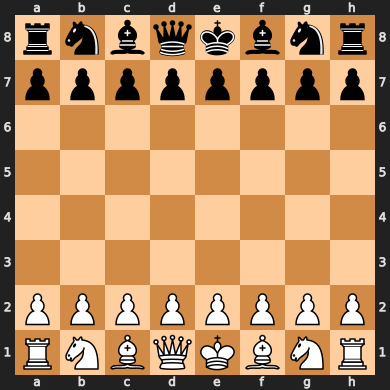

<UciProtocol (pid=16807)>: stderr >> Loading weights file from: ./data/maia_weights/maia-1200.pb.gz
<UciProtocol (pid=16807)>: stderr >> Creating backend [blas]...
<UciProtocol (pid=16807)>: stderr >> BLAS vendor: OpenBLAS.
<UciProtocol (pid=16807)>: stderr >> OpenBLAS [OpenBLAS 0.3.23 NO_LAPACKE DYNAMIC_ARCH NO_AFFINITY Zen MAX_THREADS=64].
<UciProtocol (pid=16807)>: stderr >> OpenBLAS found 16 Zen core(s).
<UciProtocol (pid=16807)>: stderr >> BLAS max batch size is 256.


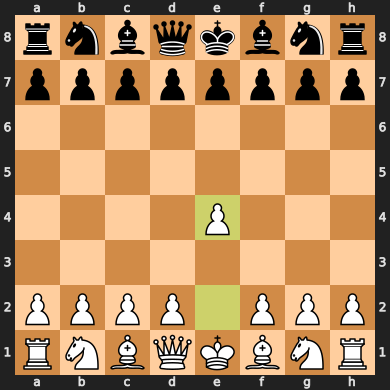

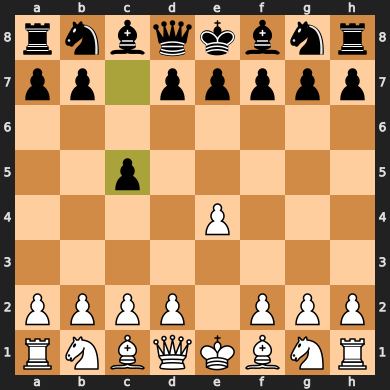

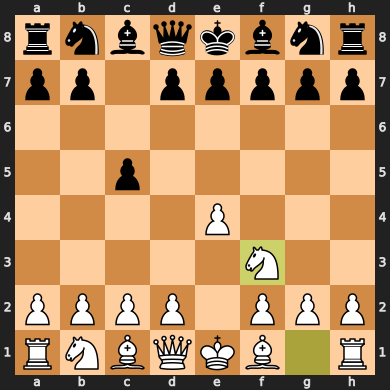

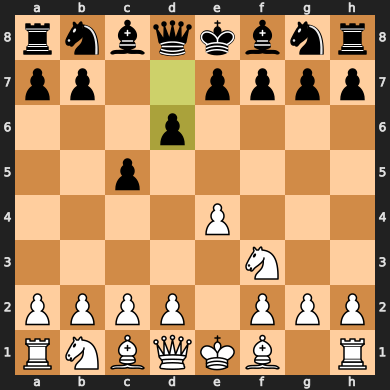

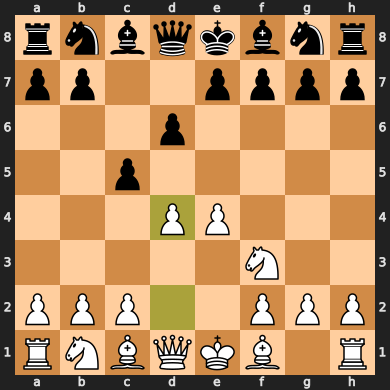

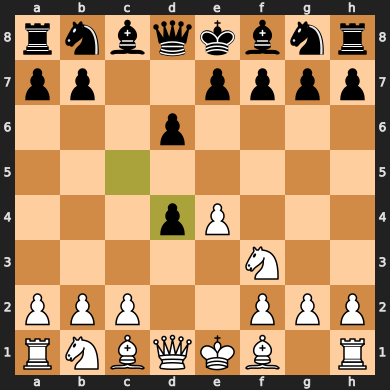

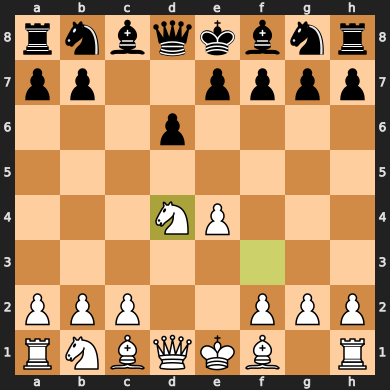

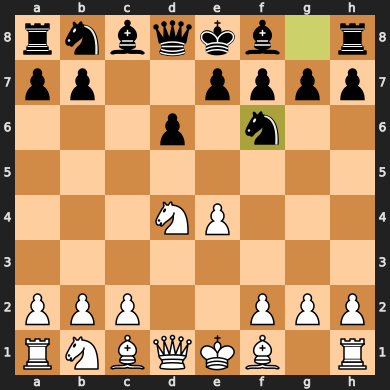

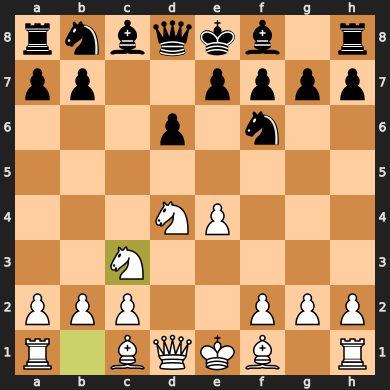

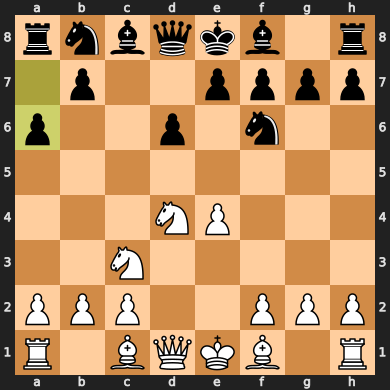

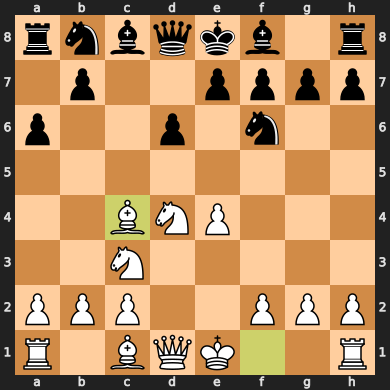

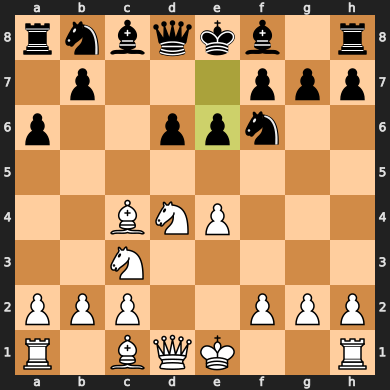

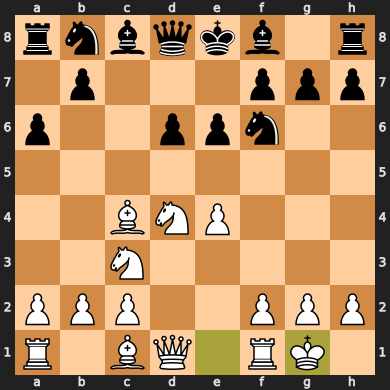

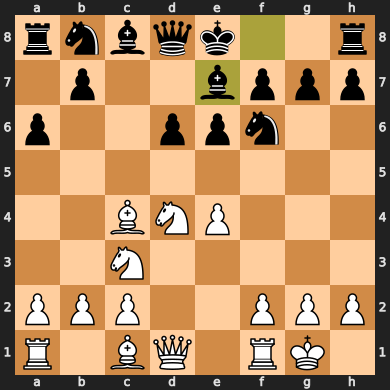

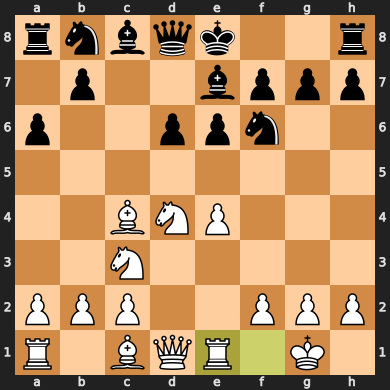

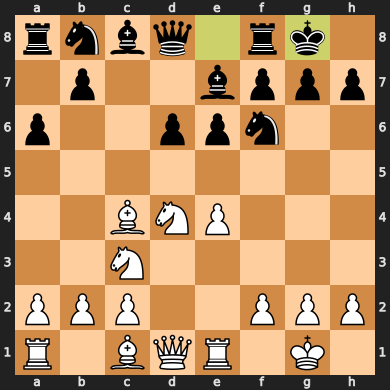

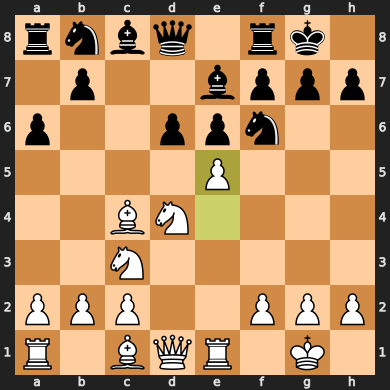

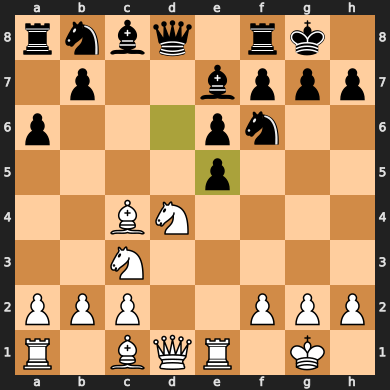

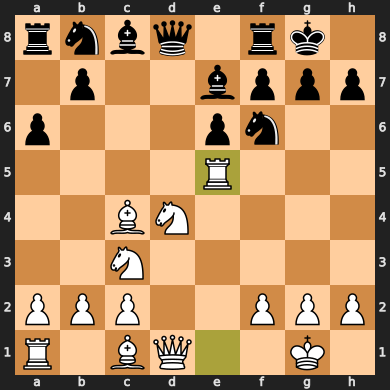

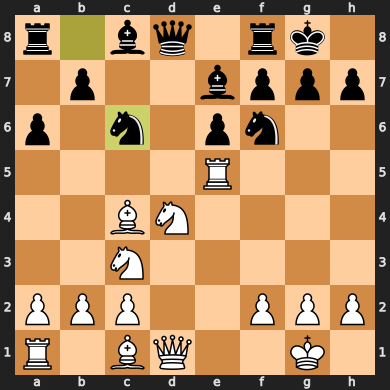

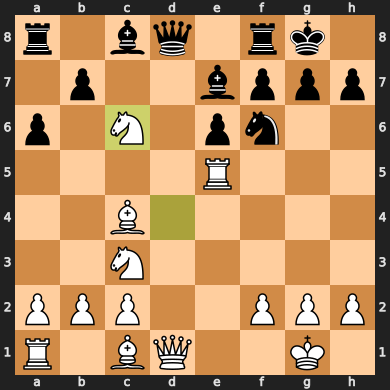

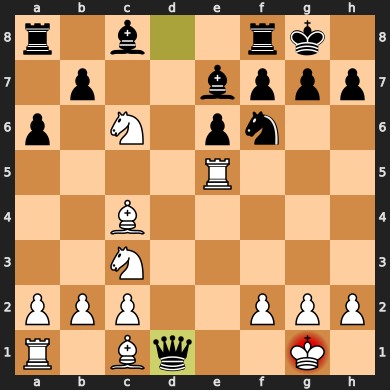

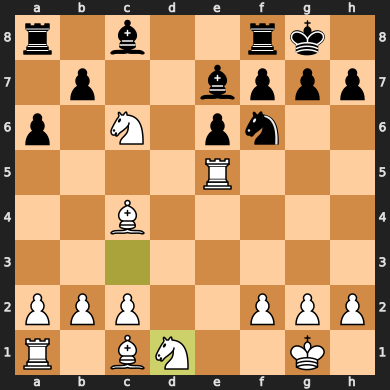

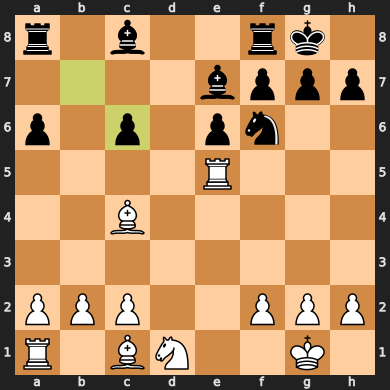

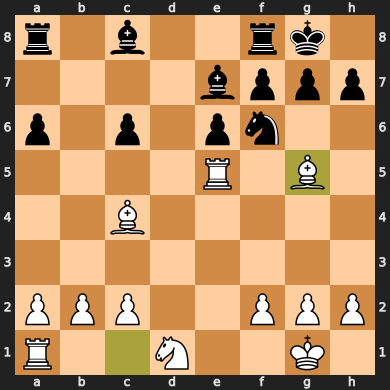

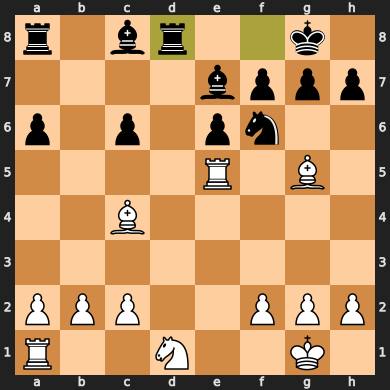

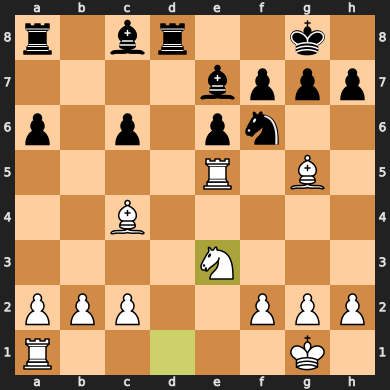

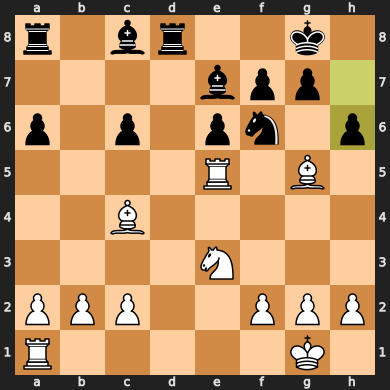

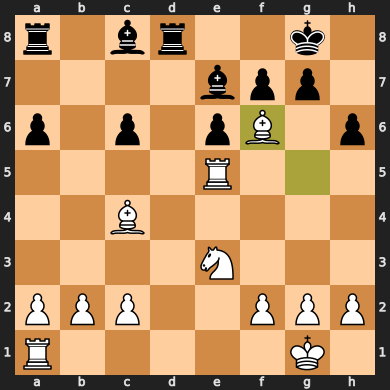

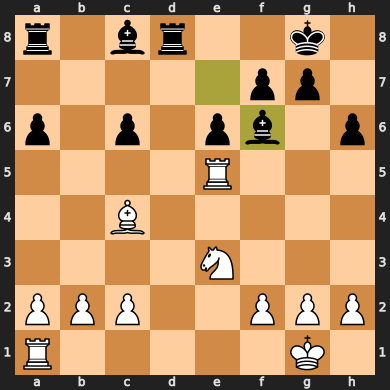

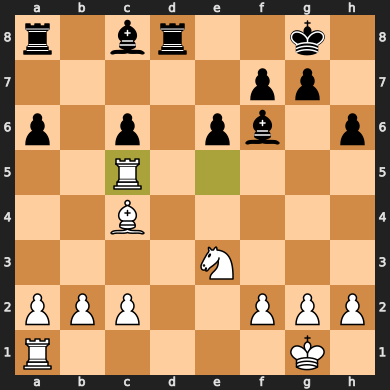

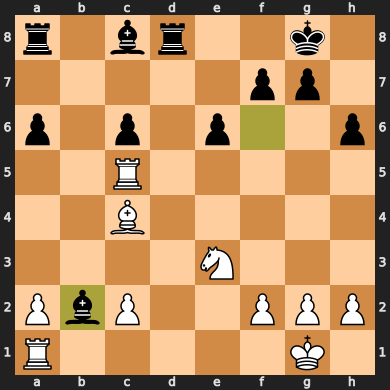

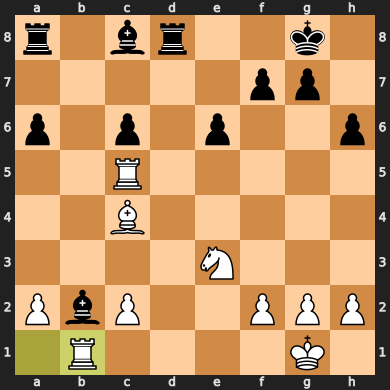

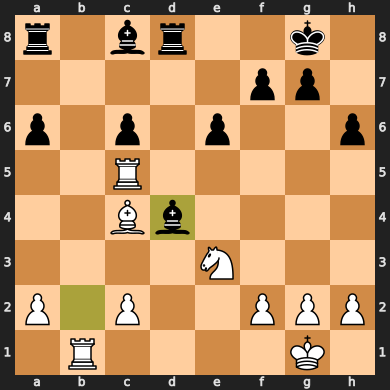

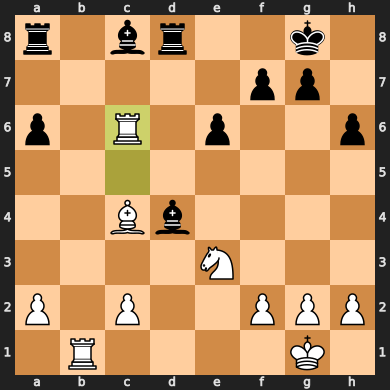

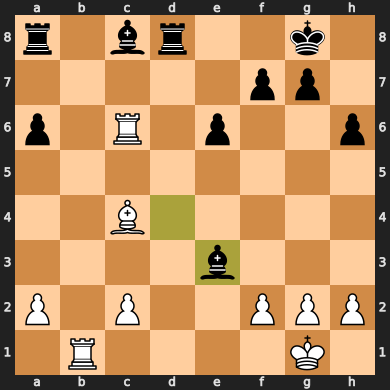

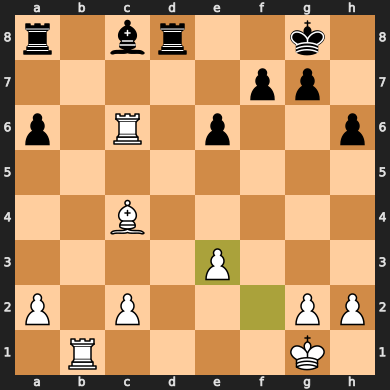

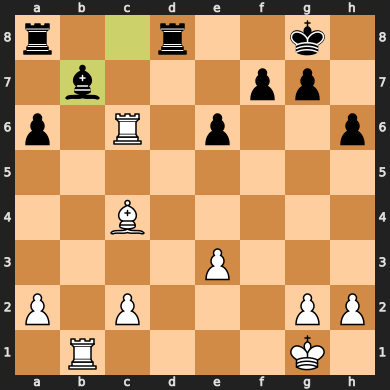

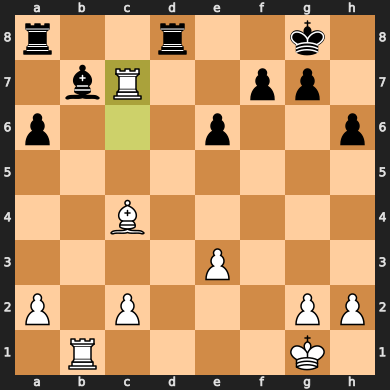

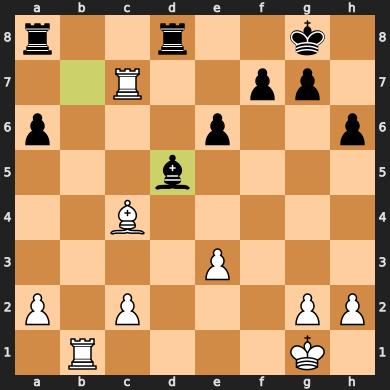

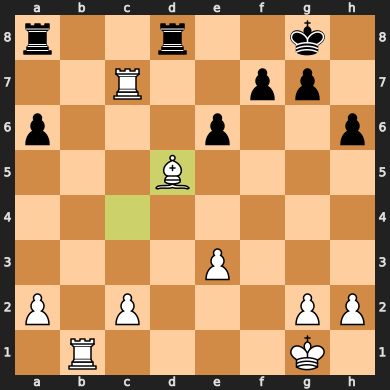

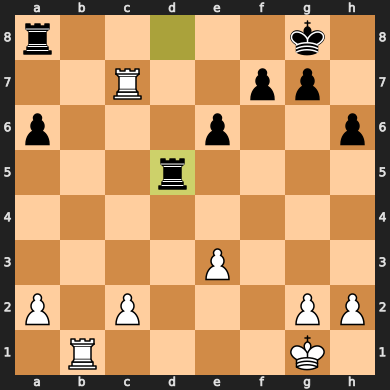

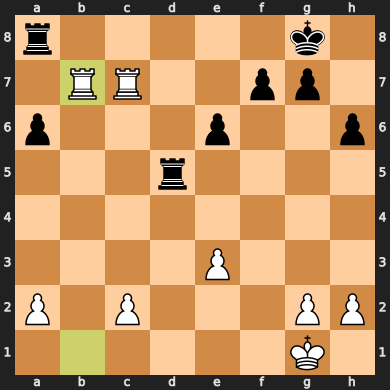

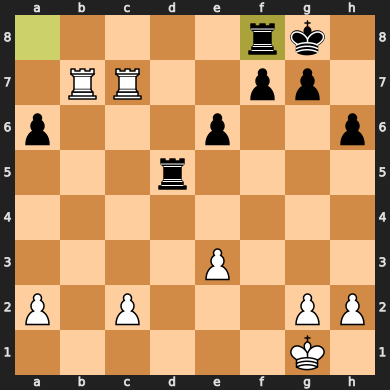

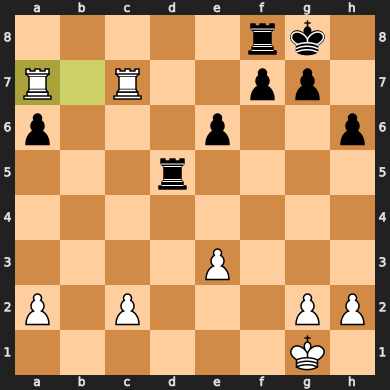

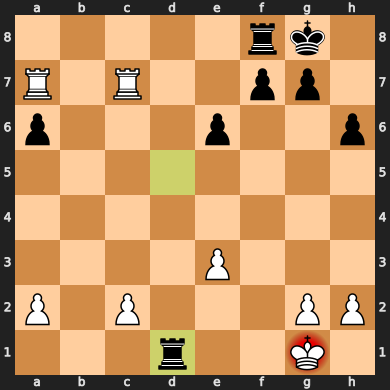

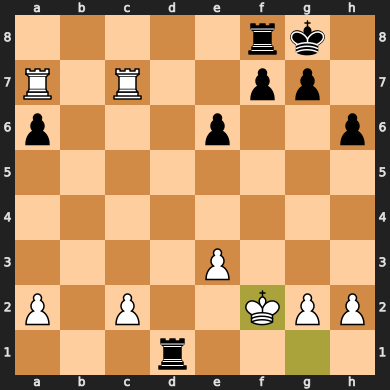

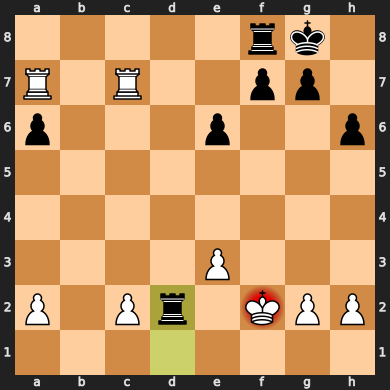

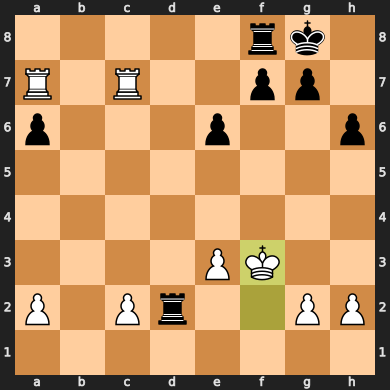

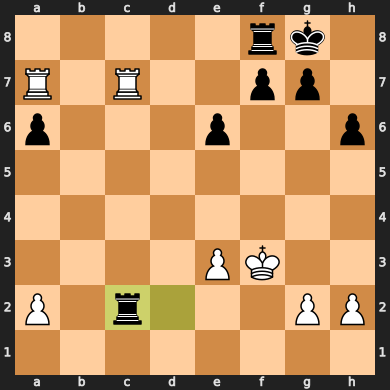

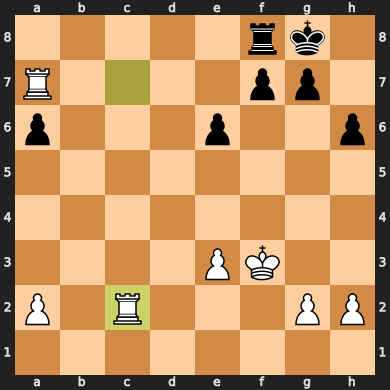

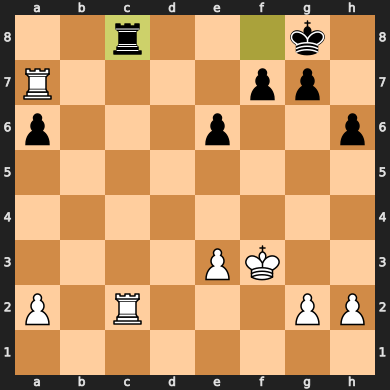

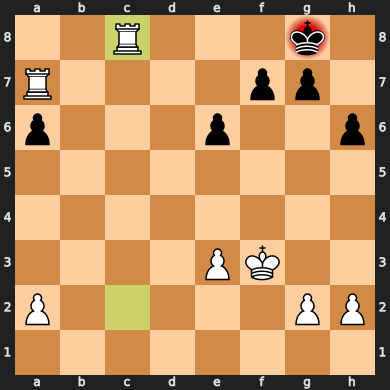

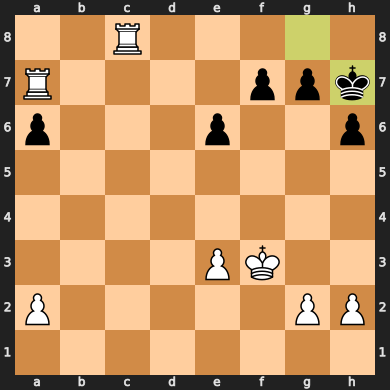

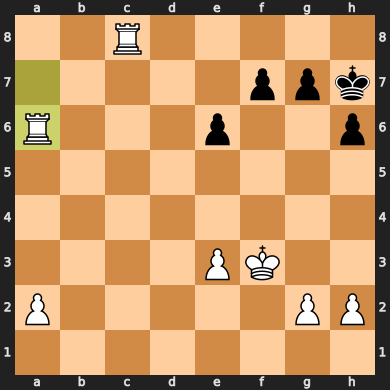

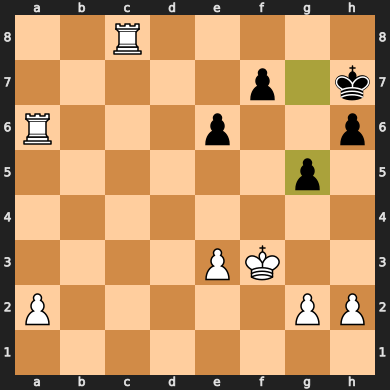

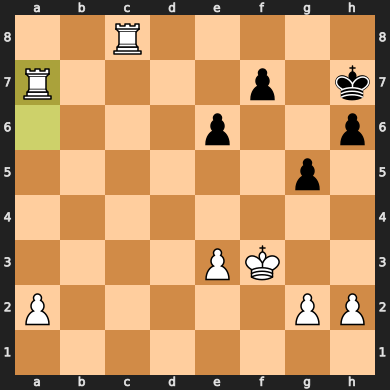

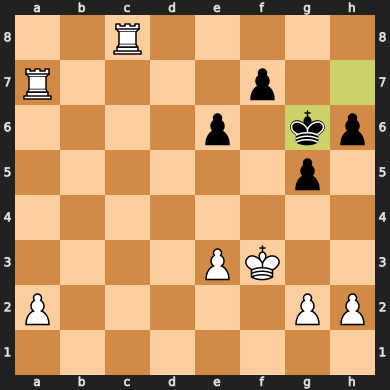

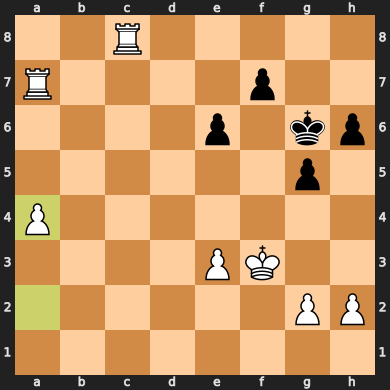

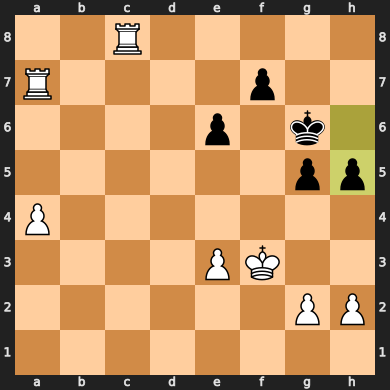

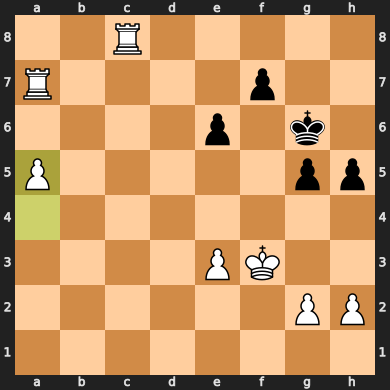

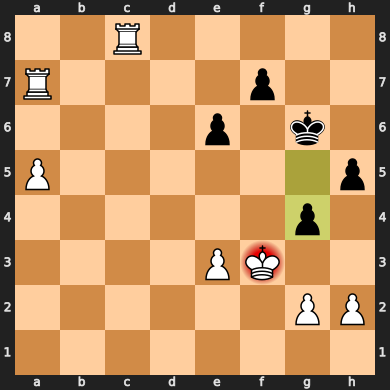

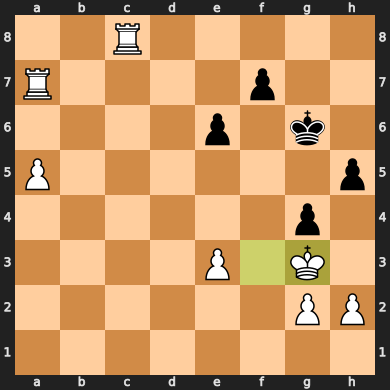

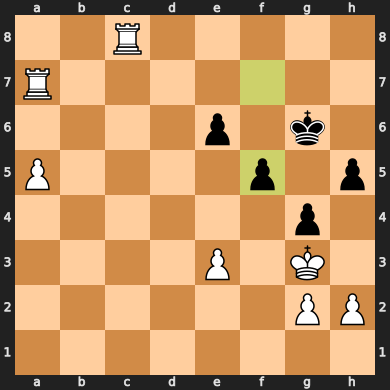

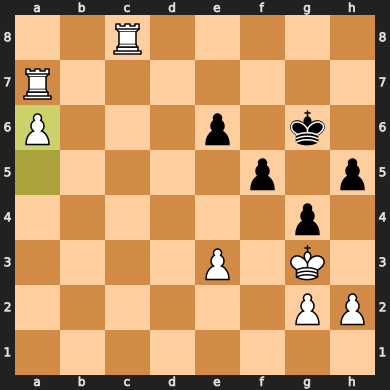

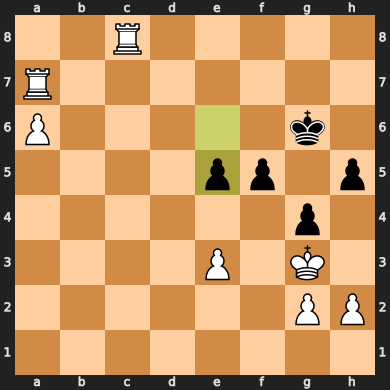

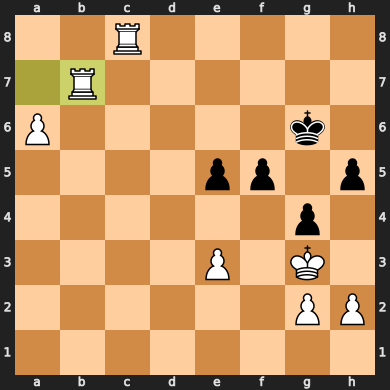

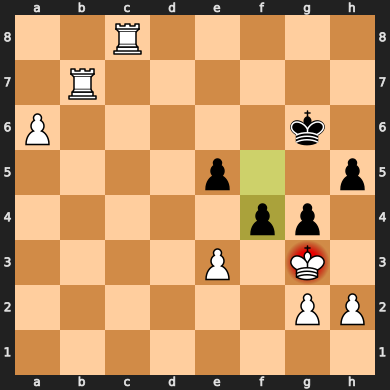

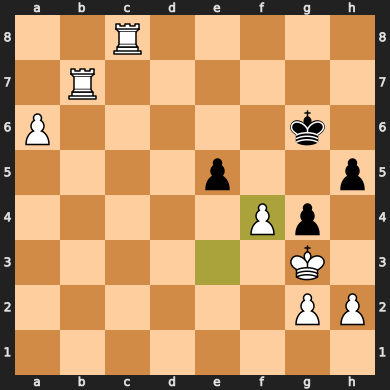

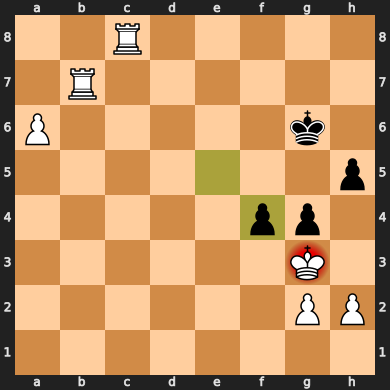

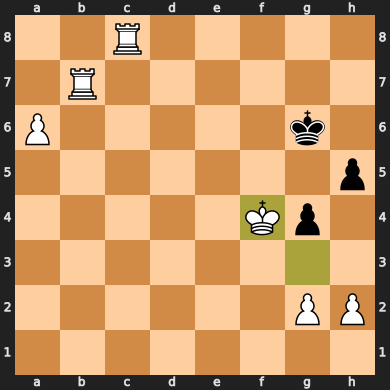

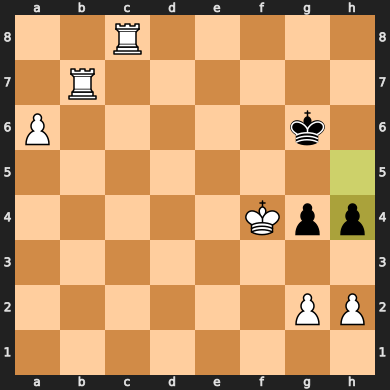

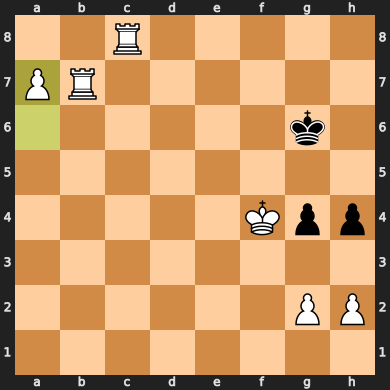

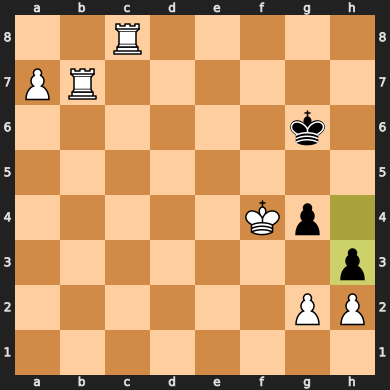

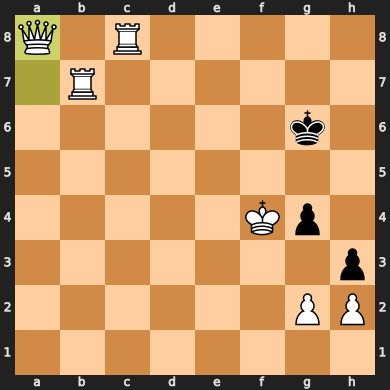

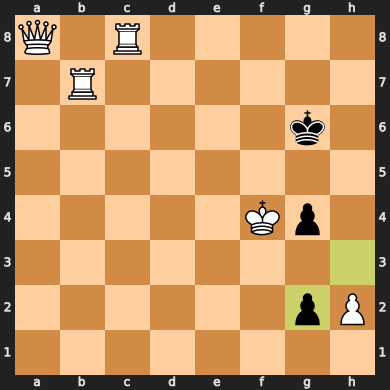

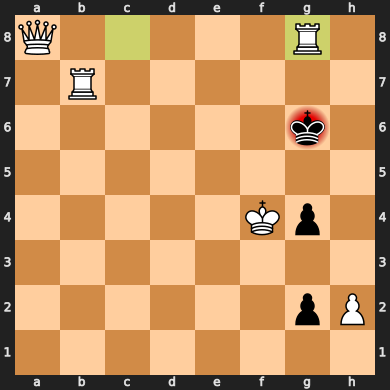

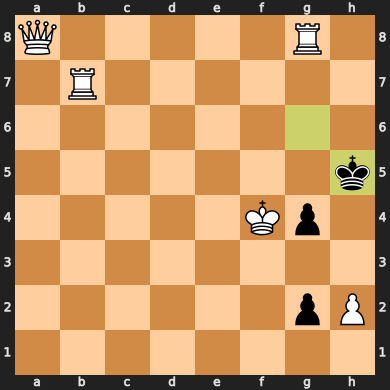

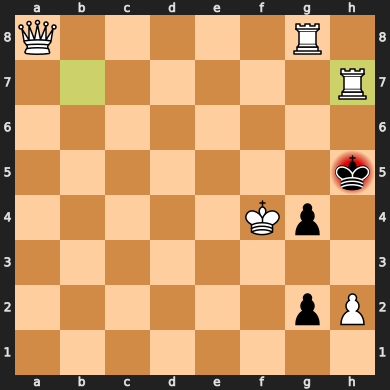

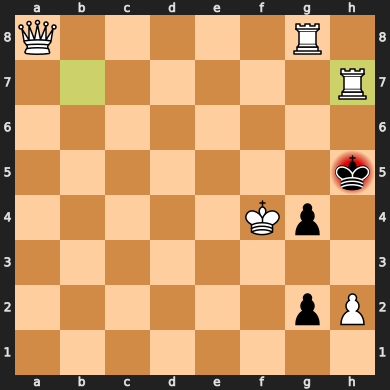

In [9]:
play_game(maia_1100_agent, agent, verbose=True)

In [28]:
minimax_agent = NegaMaxMaterialAgent(depth=3)

In [33]:
test_agent(agent, minimax_agent, n_games=10)

100%|██████████| 5/5 [00:18<00:00,  3.80s/it]


Counter({-1: 4, 1: 1})


100%|██████████| 5/5 [00:18<00:00,  3.63s/it]

Counter({1: 4, 0: 1})


{'white': Counter({-1: 4, 1: 1}), 'black': Counter({1: 4, 0: 1})}

In [ ]:
play_game(minimax_agent, agent, verbose=True)

In [12]:
print(test_agent(agent, n_games=100))

100%|██████████| 50/50 [00:07<00:00,  6.43it/s]


Counter({1: 47, 0: 3})


100%|██████████| 50/50 [00:12<00:00,  4.08it/s]

Counter({-1: 46, 0: 4})
{'white': Counter({1: 47, 0: 3}), 'black': Counter({-1: 46, 0: 4})}


In [13]:
print(test_agent(agent_2, n_games=100))

100%|██████████| 50/50 [00:09<00:00,  5.48it/s]


Counter({1: 45, 0: 5})


100%|██████████| 50/50 [00:14<00:00,  3.39it/s]

Counter({-1: 46, 0: 4})
{'white': Counter({1: 45, 0: 5}), 'black': Counter({-1: 46, 0: 4})}


In [9]:
test_agent(agent, agent_2, n_games=2)

100%|██████████| 1/1 [00:01<00:00,  1.35s/it]


Counter({-1: 1})


100%|██████████| 1/1 [00:00<00:00,  2.52it/s]

Counter({-1: 1})


{'white': Counter({-1: 1}), 'black': Counter({-1: 1})}

In [8]:
square_token_agent = GPTSquareTokenAgent()

In [ ]:
play_game(square_token_agent, maia_1100_agent, verbose=True)

In [71]:
square_token_agent = GPTSquareTokenAgent()
test_agent(square_token_agent, n_games=100)

100%|██████████| 50/50 [07:11<00:00,  8.63s/it]


Counter({1: 49, 0: 1})


100%|██████████| 50/50 [07:49<00:00,  9.40s/it]

Counter({-1: 48, 0: 2})


{'white': Counter({1: 49, 0: 1}), 'black': Counter({-1: 48, 0: 2})}

In [75]:
agent = GPTAgent(model)
test_agent(agent, n_games=100)

100%|██████████| 50/50 [00:06<00:00,  7.33it/s]


Counter({1: 45, 0: 5})


100%|██████████| 50/50 [00:13<00:00,  3.61it/s]

Counter({-1: 45, 0: 5})


{'white': Counter({1: 45, 0: 5}), 'black': Counter({-1: 45, 0: 5})}

In [15]:
# Mój GPT vs GPT z "Chess as a testbed..."

print(test_agent(agent, square_token_agent, n_games=100))
print(square_token_agent.random_move_count)
# results = []

# for i in range(10):
#     board = play_game(agent, square_token_agent, verbose=False)
#     print(simple_result(board))
#     display(board)

100%|██████████| 50/50 [05:07<00:00,  6.16s/it]


Counter({1: 43, 0: 5, -1: 2})


100%|██████████| 50/50 [06:51<00:00,  8.23s/it]

Counter({-1: 50})
{'white': Counter({1: 43, 0: 5, -1: 2}), 'black': Counter({-1: 50})}
236


In [17]:
test_agent(agent, n_games=100)

100%|██████████| 50/50 [00:09<00:00,  5.06it/s]


Counter({1: 48, 0: 2})


100%|██████████| 50/50 [00:12<00:00,  4.11it/s]

Counter({-1: 47, 0: 3})


{'white': Counter({1: 48, 0: 2}), 'black': Counter({-1: 47, 0: 3})}

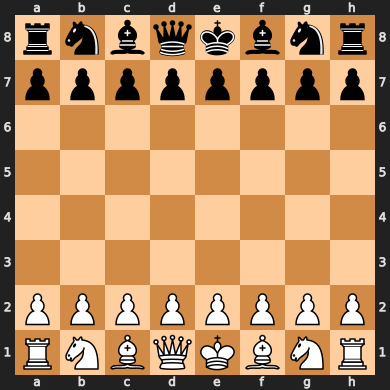

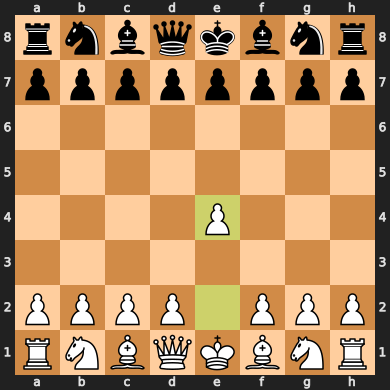

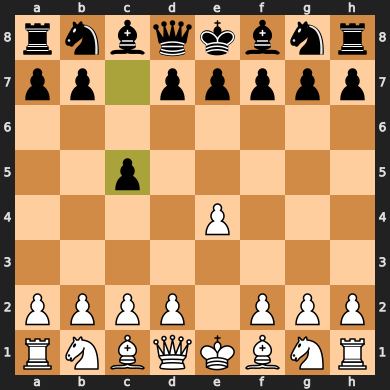

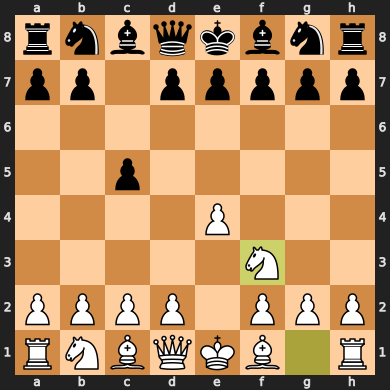

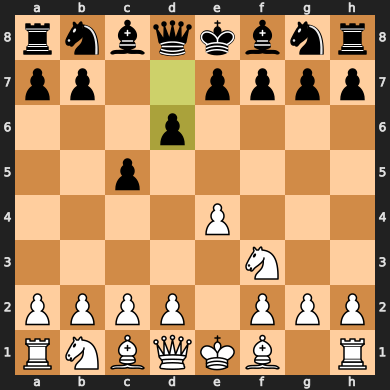

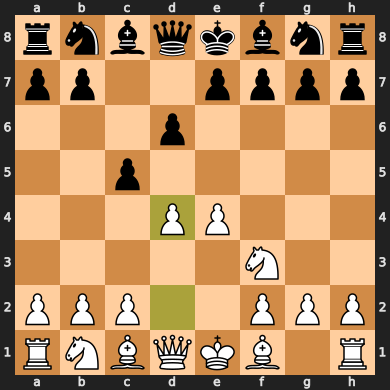

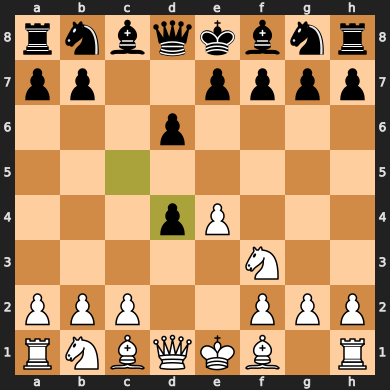

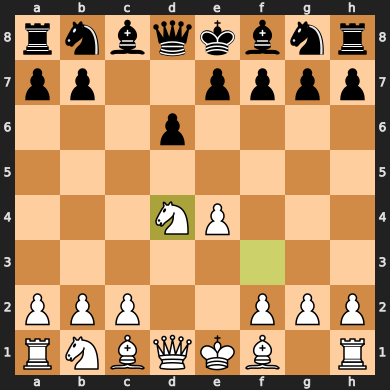

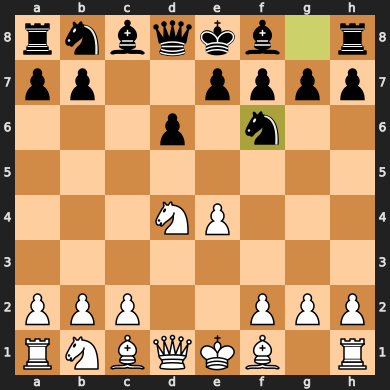

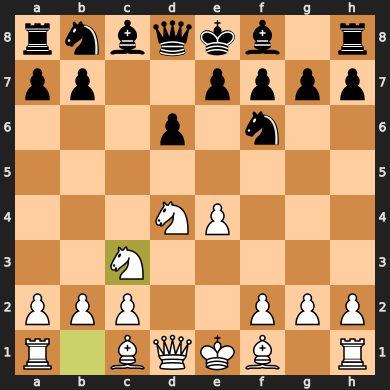

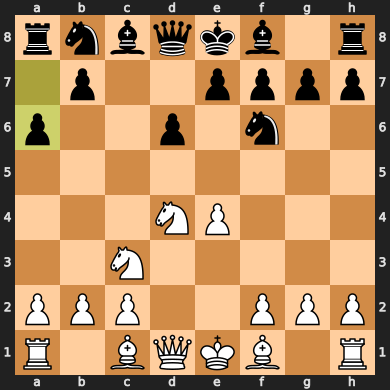

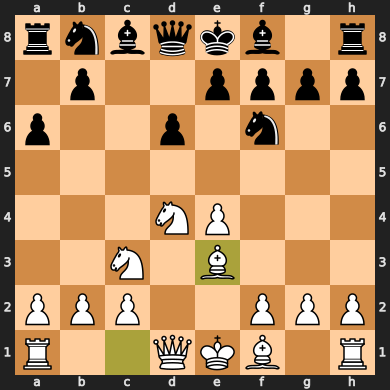

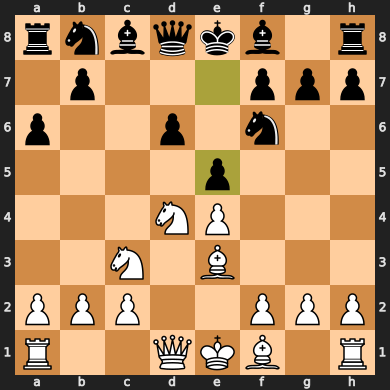

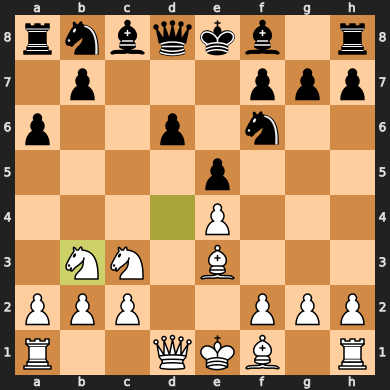

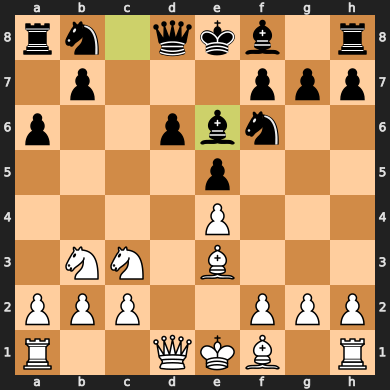

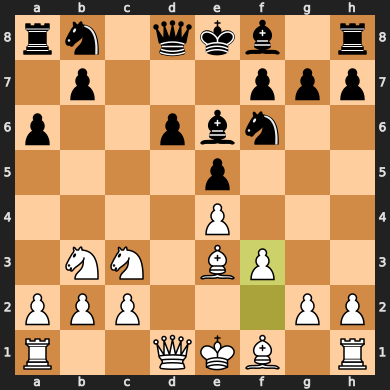

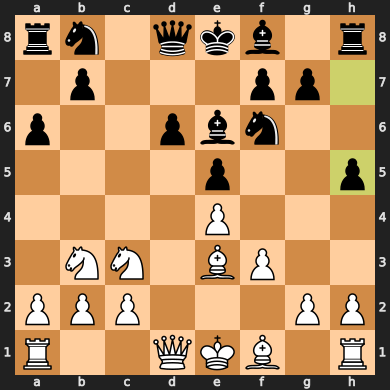

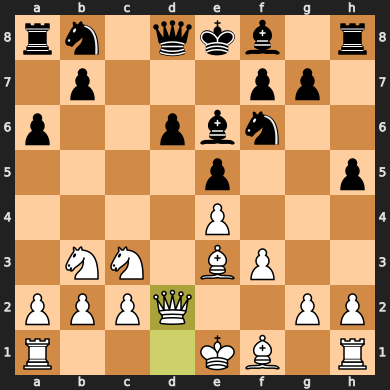

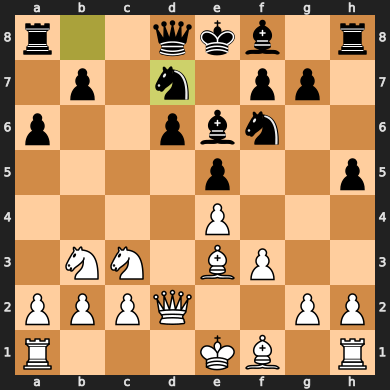

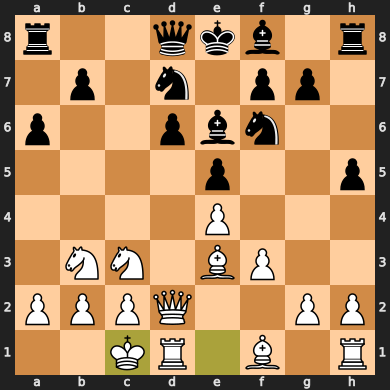

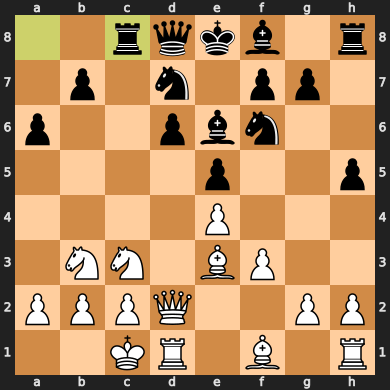

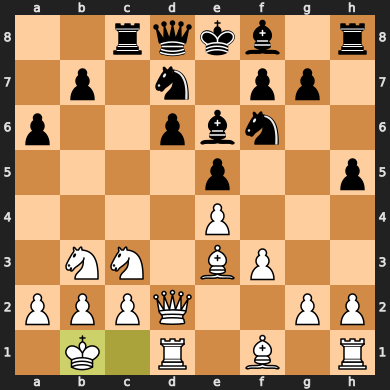

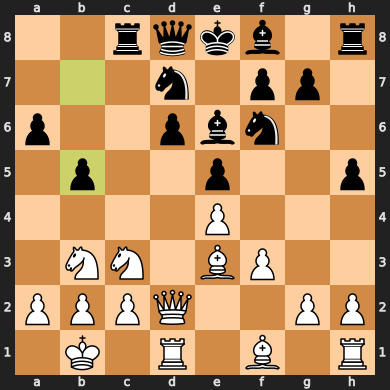

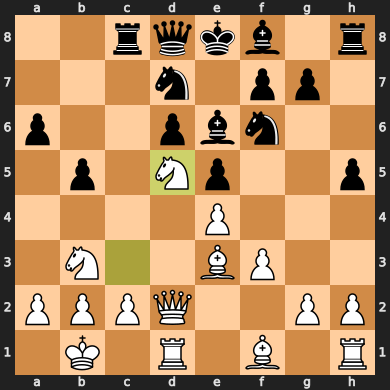

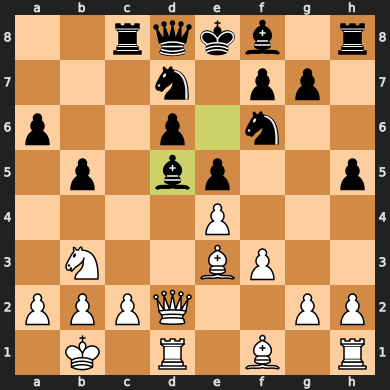

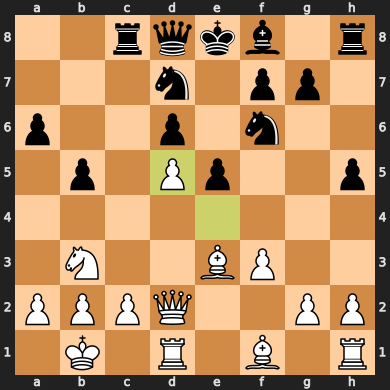

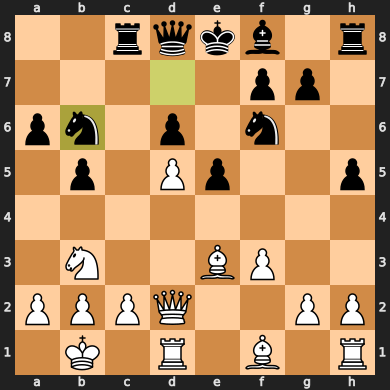

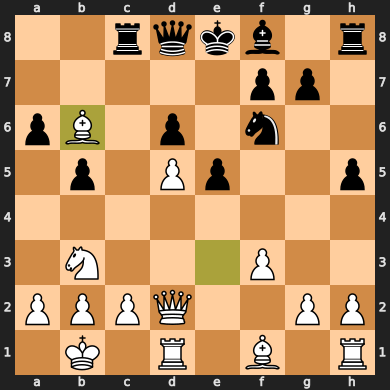

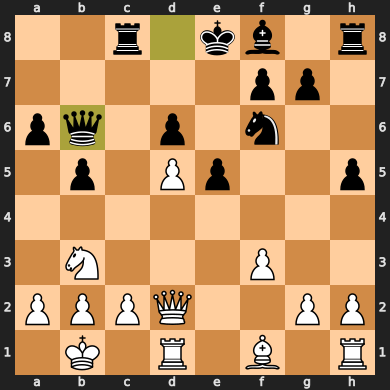

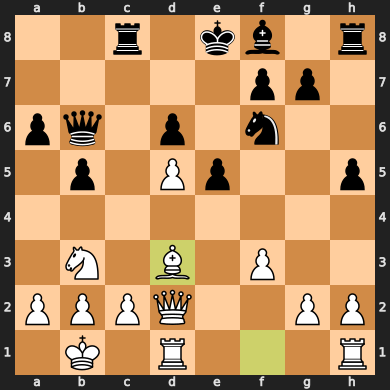

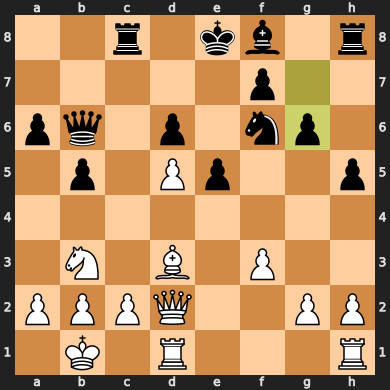

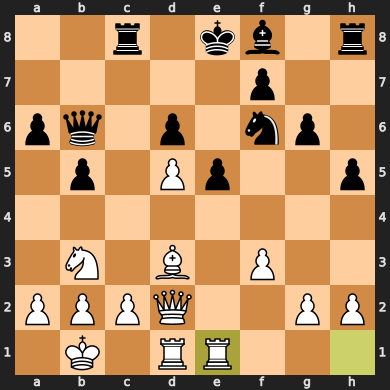

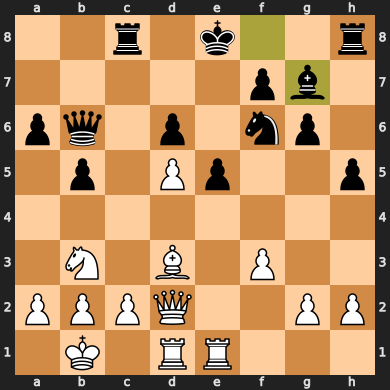

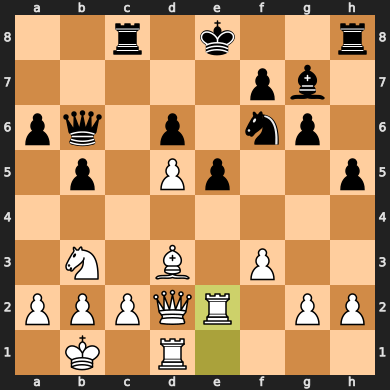

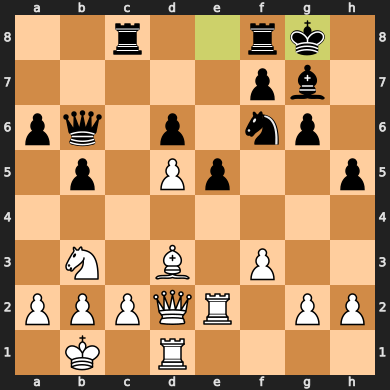

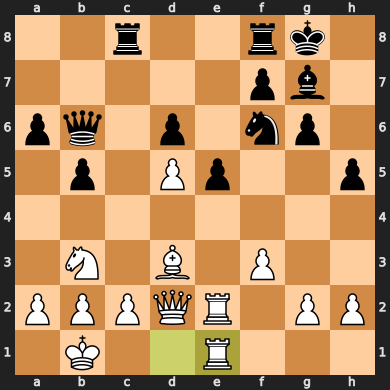

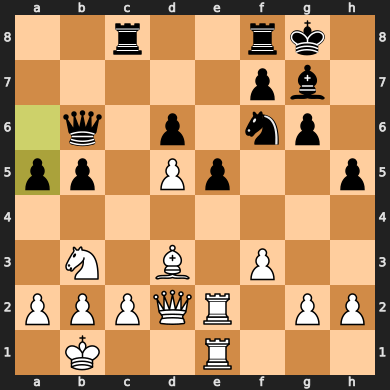

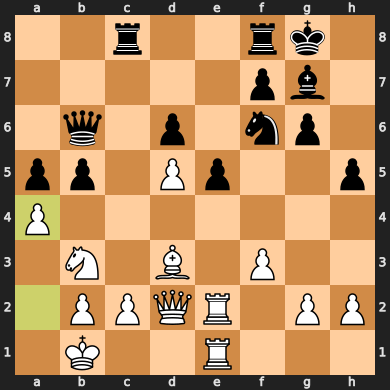

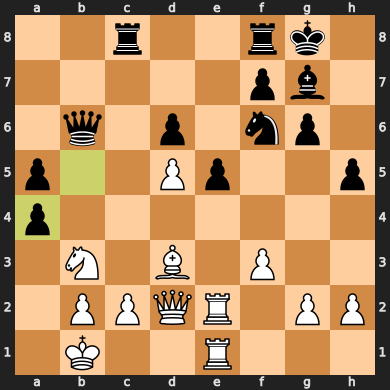

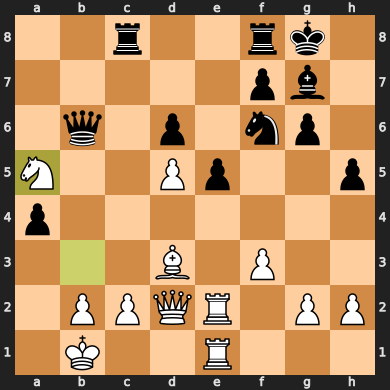

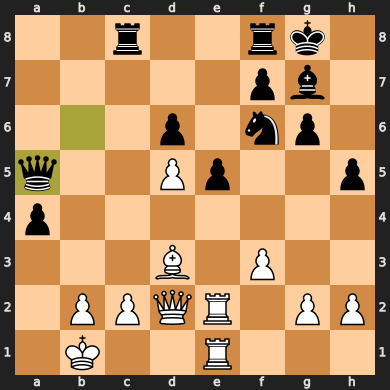

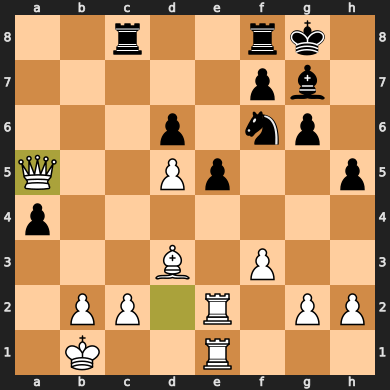

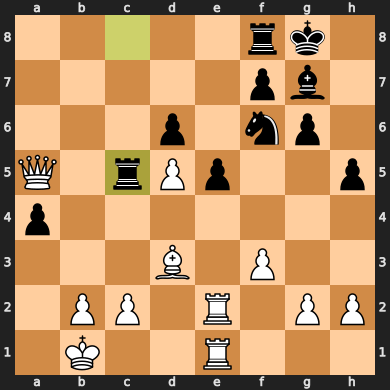

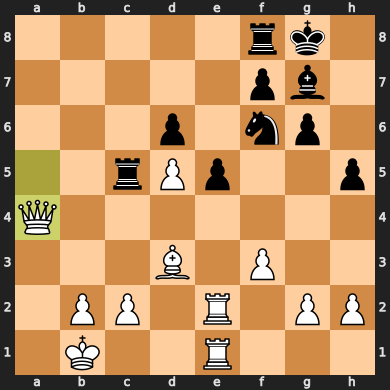

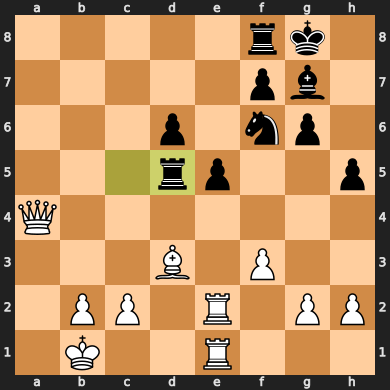

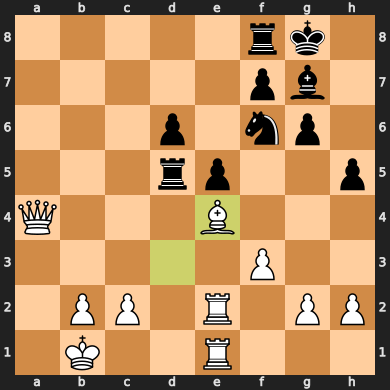

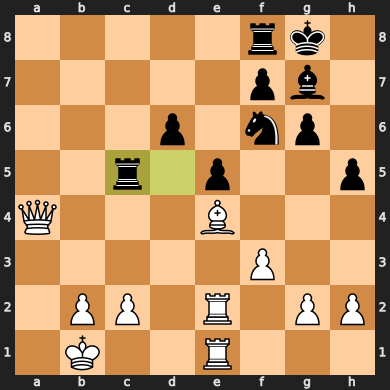

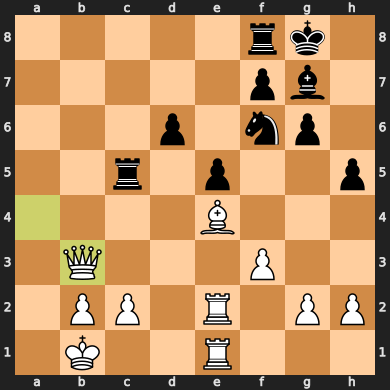

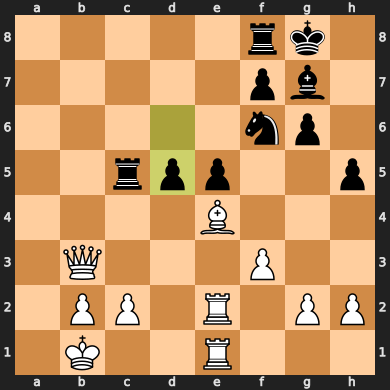

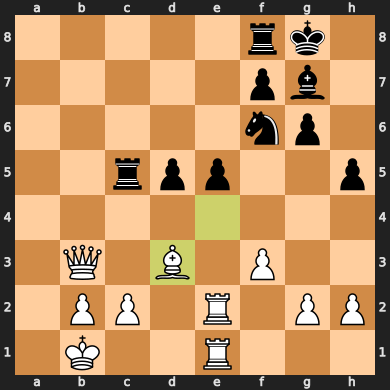

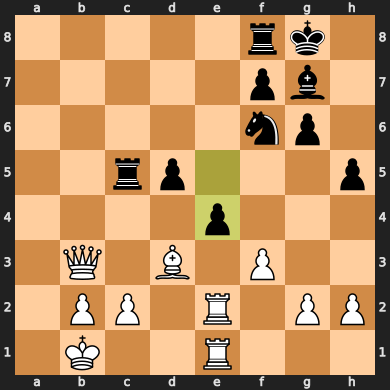

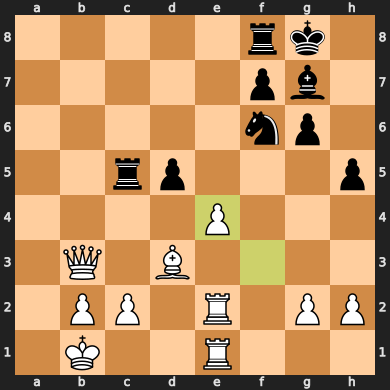

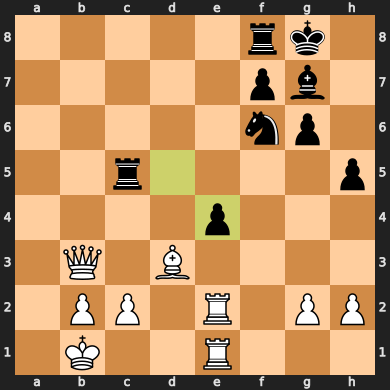

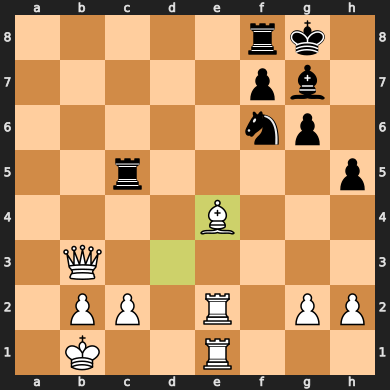

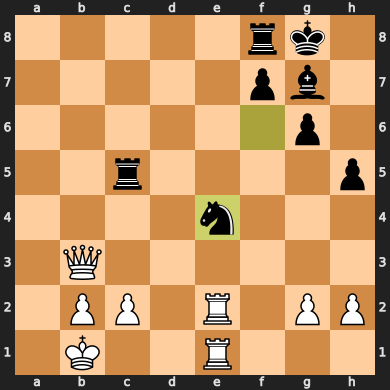

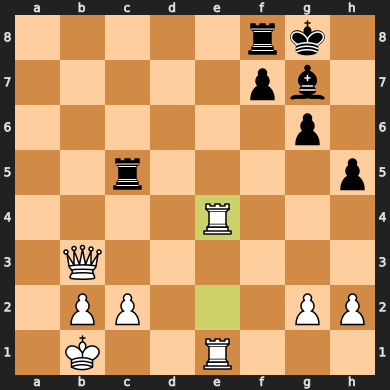

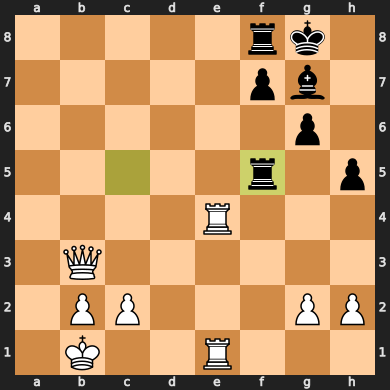

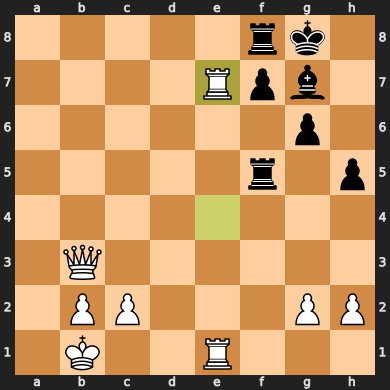

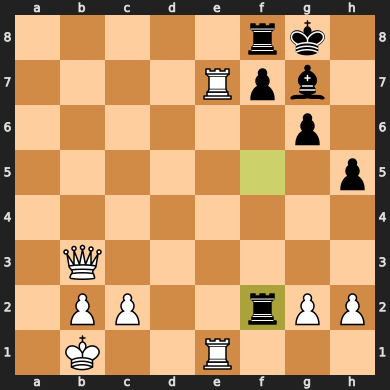

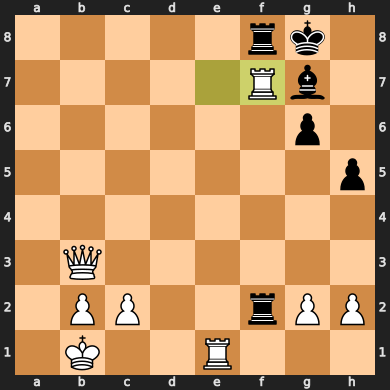

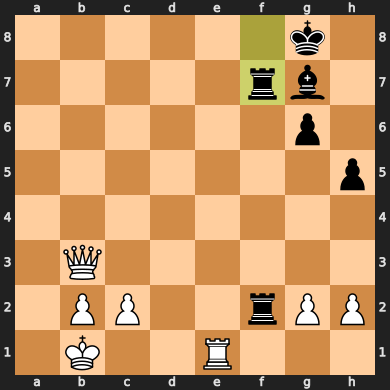

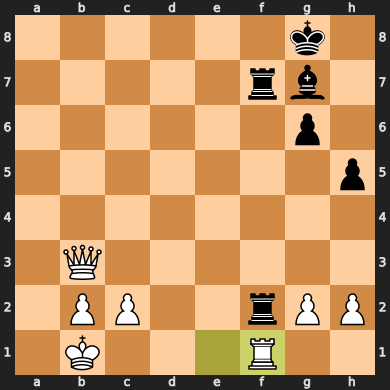

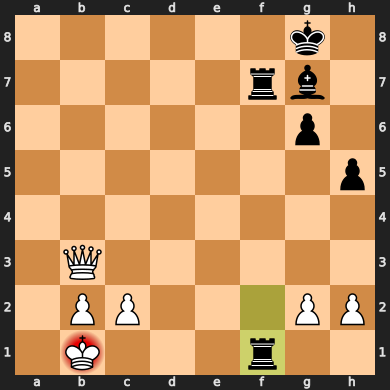

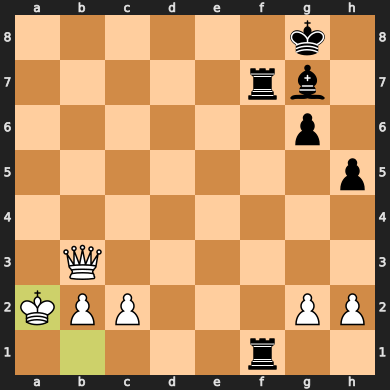

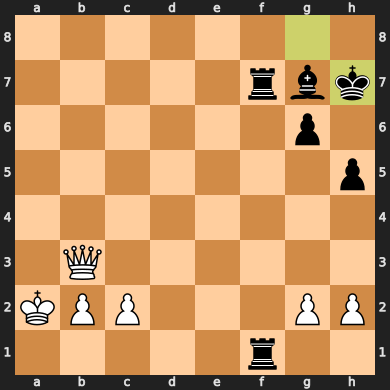

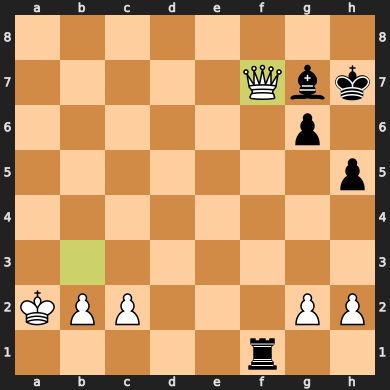

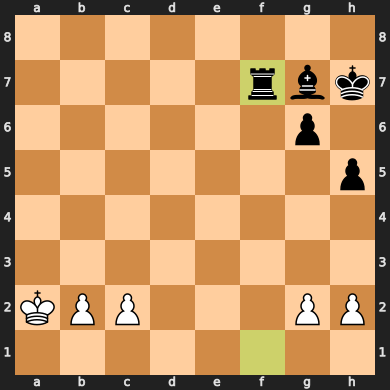

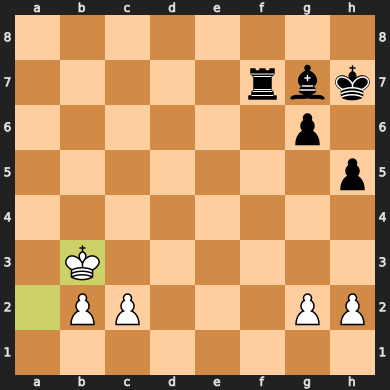

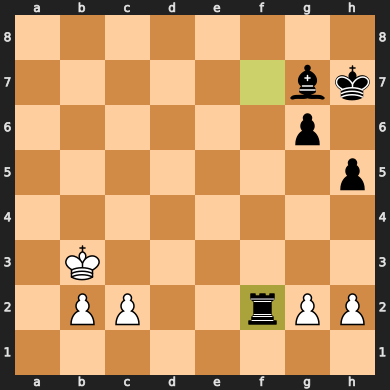

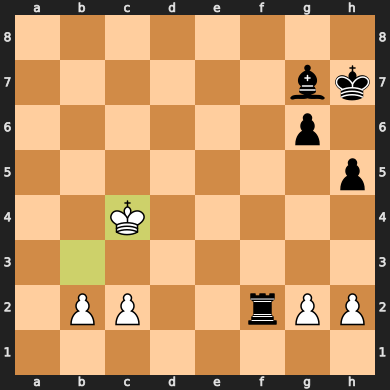

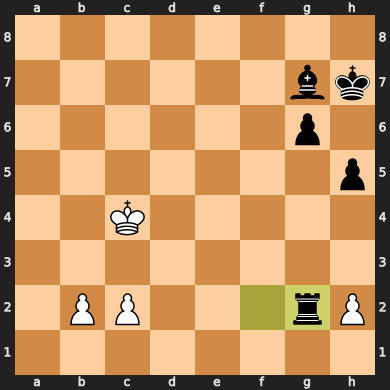

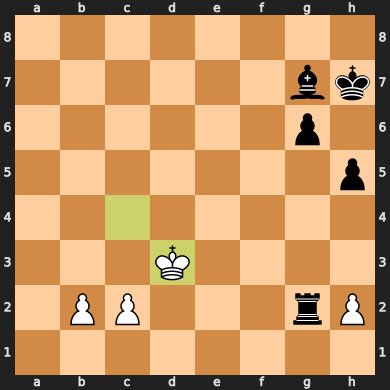

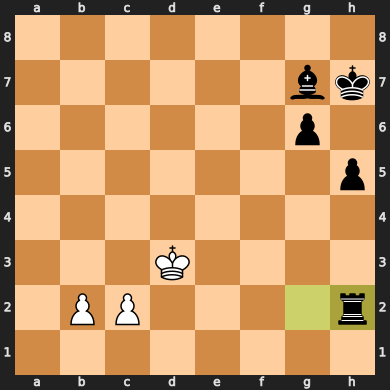

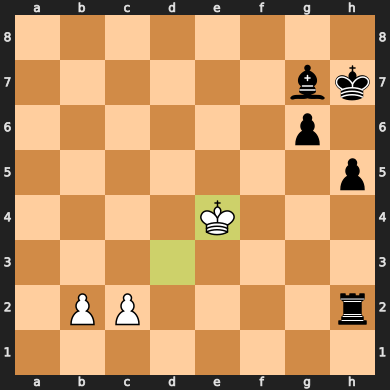

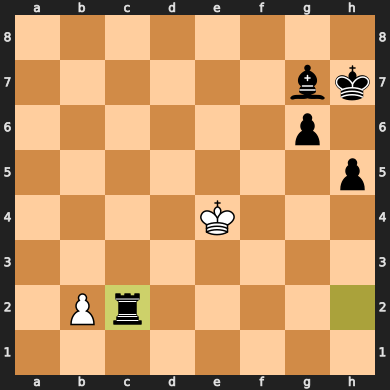

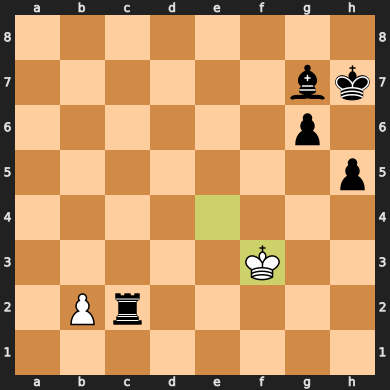

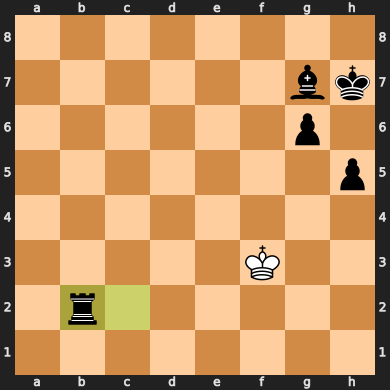

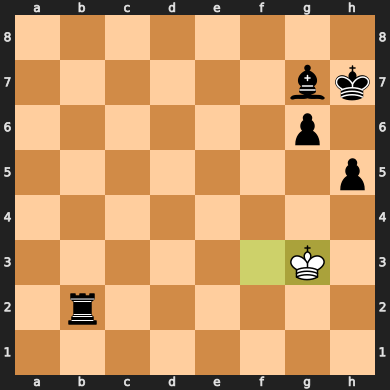

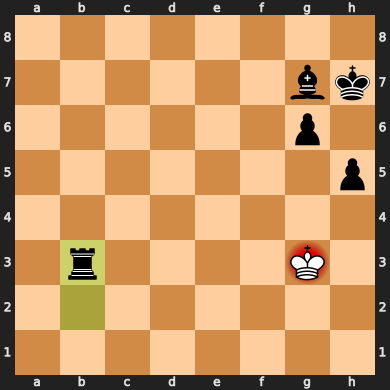

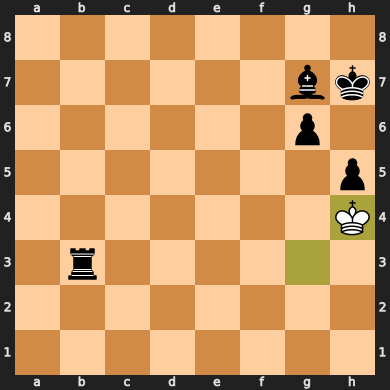

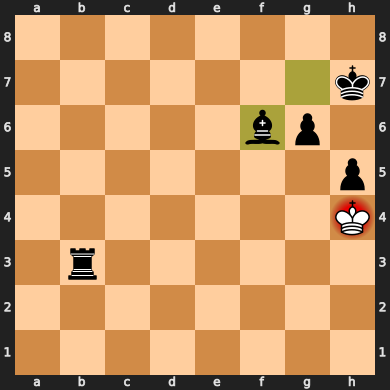

-1

In [98]:
board = play_game(square_token_agent, agent, verbose=True)
simple_result(board)

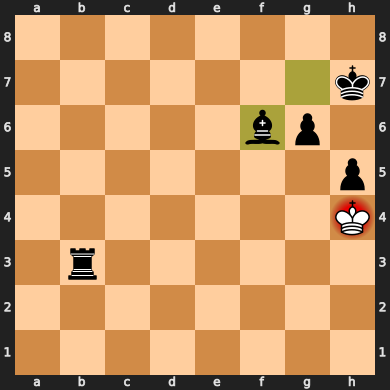

In [102]:
board = play_game(square_token_agent, agent, verbose=False)
simple_result(board)
board

In [51]:
board = chess.Board()
board.push_san("e4")
board.push_san("e5")

agent.play(board)

Move.from_uci('g1f3')

In [36]:
ids

[1, 26, 28, 11, 12, 2]

In [12]:

def board_to_uci_squares(board: chess.Board):
    res = []
    for move in board.move_stack:
        move_uci = move.uci()
        res.append(move_uci[:2])
        res.append(move_uci[2:])
        if len(move_uci) == 5:
            res.append(move_uci[4])

    return res



In [79]:
board = chess.Board()
board.push_san("e4")
board.push_san("e5")
board.push_san("Nf3")
board.push_san("Nc6")
board.push_san("Bb5")
prefix = board_to_uci_squares(board)

In [80]:
encoded = tokenizer.encode(" ".join(prefix), add_special_tokens=False)

['e2', ' ', 'e4', ' ', 'e7', ' ', 'e5', ' ', 'g1', ' ', 'f3', ' ', 'b8', ' ', 'c6', ' ', 'f1', ' ', 'b5']
